In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('../../astro_tools')
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import wcs
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import ImageGrid
from reproject import reproject_interp
from astropy import units as u
from matplotlib.lines import Line2D
from spectral_cube import SpectralCube
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import take_slice
import routine
from astropy.wcs.utils import pixel_to_skycoord
import pvextractor
import cmasher as cmr
from axes_offset import pv_path_to_rectangle, pix_to_extent, get_offset

# set up the plot
plt.rcParams['text.usetex'] = False
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["font.family"] = "courier new"
plt.rcParams["font.style"] = "normal"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.weight"] = 'bold'



Afont = {
        'family' : 'courier new',
        'color':  'black',
        'size': 18,
        }

Afontw = {
        'family' : 'courier new',
        'color':  'white',
        'size': 18,
        }


Afontc = {
        'family' : 'courier new',
        'color':  '#FFB84B',
        'size': 18,
        }

In [2]:
def guesses_CO_SW(position, params, fitnum):

    if position == 0.0:
        amp1 = 3
        vel1 = 250
        sig1 = 20
        amp2 = 1
        vel2 = 400
        sig2 = 20
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False)]
        
    else:
        guess_list = params
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False)]
    
    return guess_list, limits, limited


def guesses_HB1(position, params, fitnum):
    
    # grab the fit results for Halpha
    ha_fits = pd.read_csv('../../ngc253/muse/Nov28/fits1_total/fits1_reordered.txt')
    ha_fits = ha_fits[(ha_fits['X'] == 326) & (ha_fits['Y'] == 275)]  # general location of the starting point

    if fitnum == 1:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        guess_list = [amp1,vel1,sig1]
        limits = None
        limited = [(False, False), (False, False), (False, False)]

    elif fitnum == 2:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False)]

    elif fitnum == 3:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        amp3 = 50
        vel3 = ha_fits['Vel3'].values[0]
        sig3 = ha_fits['SigVel3'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2,amp3,vel3,sig3]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False),
                  (False, False), (False, False), (False, False)]

    return guess_list, limits, limited


def guesses_HB2(position, params, fitnum):
    
    # grab the fit results for Halpha
    ha_fits = pd.read_csv('../../ngc253/muse/Nov28/fits1_total/fits1_reordered.txt')
    ha_fits = ha_fits[(ha_fits['X'] == 320) & (ha_fits['Y'] == 295)]  # general location of the starting point

    if fitnum == 1:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        guess_list = [amp1,vel1,sig1]
        limits = None
        limited = [(False, False), (False, False), (False, False)]

    elif fitnum == 2:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False)]

    elif fitnum == 3:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        amp3 = 50
        vel3 = ha_fits['Vel3'].values[0]
        sig3 = ha_fits['SigVel3'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2,amp3,vel3,sig3]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False),
                  (False, False), (False, False), (False, False)]

    return guess_list, limits, limited


def guesses_HB5(position, params, fitnum):
    
    # grab the fit results for Halpha
    ha_fits = pd.read_csv('../../ngc253/muse/Nov28/fits1_total/fits1_reordered.txt')
    ha_fits = ha_fits[(ha_fits['X'] == 202) & (ha_fits['Y'] == 283)]  # general location of the starting point

    if fitnum == 1:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        guess_list = [amp1,vel1,sig1]
        limits = None
        limited = [(False, False), (False, False), (False, False)]


    elif fitnum == 2:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False)]

    elif fitnum == 3:
        amp1 = 50
        vel1 = ha_fits['Vel1'].values[0]
        sig1 = ha_fits['SigVel1'].values[0]
        amp2 = 50
        vel2 = ha_fits['Vel2'].values[0]
        sig2 = ha_fits['SigVel2'].values[0]
        amp3 = 50
        vel3 = ha_fits['Vel3'].values[0]
        sig3 = ha_fits['SigVel3'].values[0]
        guess_list = [amp1,vel1,sig1,amp2,vel2,sig2,amp3,vel3,sig3]
        limits = None
        limited = [(False, False), (False, False), (False, False), 
                   (False, False), (False, False), (False, False),
                  (False, False), (False, False), (False, False)]

    return guess_list, limits, limited



def line_flux(amp, sig):
    
    """
    
    Adopted from https://lukeholden.com/blog/measuring_emission_line_fluxes_python.html#measuring_line_fluxes
    
    """
    
    sig_Ang = (sig * 2.2) / 100
    
    flux = amp * sig_Ang * np.sqrt(2*np.pi)
#     flux_err = flux*np.sqrt((peak_err/peak)**2 + (width_err/width)**2)
    return flux

### PLOTTING THE SLICES

In [3]:
Vsys_center = 243.
Vsys_sw = 280.

# define the slice!
pa = 320+180  # measuring N-S
width_CO = 5.133*0.3  # pixels*arcsec/pixel
length1_CO = 34.*0.3 # pixels*arcsec/pixel

# ============================================================================================================
# ============================================================================================================
COfilename = '../../ngc253/muse/data/CO21_briggs_03aug2017_feather_SD1_newTP-flg-agr-vel2_19sep.fits'
velocity_convention = 'radio'
restfreq = 230.538 * u.GHz
ContUpper = 450
ContLower = 100

x1_CO_SW = 223.147
y1_CO_SW = 164.515
# extract the slice and the spectra along the slice
COslice1, path1CO, spectra_list1, COspatial_axis_arcsec1, velocity_axis = take_slice.slice_extractor(COfilename,
               x1_CO_SW, y1_CO_SW, length1_CO, pa, width_CO, velocity_convention, restfreq)


# ============================================================================================================
# ============================================================================================================
NIIfilename = '../../ngc253/muse/data/ADP.2018-11-22T21_29_46.157.fits'
fits2_file = '../../ngc253/muse/Nov28/fits2_total/fits2_reordered.txt'
ERRfits2_file = '../../ngc253/muse/data/Nov28/fits2_total/fits2_err_reordered.txt'
NII = fits.open(NIIfilename)[1]
z, y, x = NII.data.shape

ra_hms, dec_dms = get_offset(NII.data, wcs.WCS(NII.header, naxis=2).celestial)
pixscale = 0.2  # arcsec
x_lower = -(NII.shape[2]*pixscale)//2
x_upper = (NII.shape[2]*pixscale)//2
y_lower = -(NII.shape[1]*pixscale)//2
y_upper = (NII.shape[1]*pixscale)//2
extent=[x_lower,x_upper, y_lower,y_upper]

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

NII_amps_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_amp_outflow_blue.fits')
NII_amps_blue_3D = np.empty((1,NII_amps_blue[0].data.shape[0],NII_amps_blue[0].data.shape[1]))
NII_amps_blue_3D[:,:,:] = NII_amps_blue[0].data
NII_amps_cube = SpectralCube(NII_amps_blue_3D, wcs=wcs.WCS(NII))

NII_vels_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_vel_outflow_blue.fits')
NII_vels_blue_3D = np.empty((1,NII_vels_blue[0].data.shape[0],NII_vels_blue[0].data.shape[1]))
NII_vels_blue_3D[:,:,:] = NII_vels_blue[0].data
NII_vels_cube = SpectralCube(NII_vels_blue_3D, wcs=wcs.WCS(NII))

NII_fwhm_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_sig_outflow_blue.fits')
NII_fwhm_blue_3D = np.empty((1,NII_fwhm_blue[0].data.shape[0],NII_fwhm_blue[0].data.shape[1]))
NII_fwhm_blue_3D[:,:,:] = NII_fwhm_blue[0].data
NII_fwhm_cube = SpectralCube(NII_fwhm_blue_3D, wcs=wcs.WCS(NII))
# ------------------------------------------------------------------------------------------------------------

# extract the first slice
y1_NII_SW = 257
x1_NII_SW = 304
width_NII = 7.7*0.2  # pixels*arcsec/pixel
length1_NII = 51.*0.2 # pixels*arcsec/pixel

coord1 = pixel_to_skycoord(x1_NII_SW, y1_NII_SW, wcs=wcs.WCS(NII))
path1NII = pvextractor.PathFromCenter(center=coord1,
                    length=length1_NII * u.arcsec,
                    angle=pa * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice1_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path1NII)
NIIslice1_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path1NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list1 = [float(NIIslice1_vels.data[:,i]) for i in range(NIIslice1_vels.shape[1])]
NII_fwhm_list1 = [float(NIIslice1_fwhm.data[:,i]) for i in range(NIIslice1_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg1 = wcs.WCS(NIIslice1_vels.header).array_index_to_world_values(np.zeros(NIIslice1_vels.shape[1]), np.arange(NIIslice1_vels.shape[1]))
NIIspatial_axis_arcsec1 = (NIIspatial_axis_deg1[0] * u.deg).to(u.arcsec).to_value()

# ------------------------------------------------------------------------------------------------------------
y2_NII_SW = 195
x2_NII_SW = 280

pa2 = 340+180  # measuring N-S
length2_NII = 235.*0.2 # pixels*arcsec/pixel

coord2 = pixel_to_skycoord(x2_NII_SW, y2_NII_SW, wcs=wcs.WCS(NII))
path2NII = pvextractor.PathFromCenter(center=coord2,
                    length=length2_NII * u.arcsec,
                    angle=pa2 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice2_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path2NII)
NIIslice2_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path2NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list2 = [float(NIIslice2_vels.data[:,i]) for i in range(NIIslice2_vels.shape[1])]
NII_fwhm_list2 = [float(NIIslice2_fwhm.data[:,i]) for i in range(NIIslice2_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg2 = wcs.WCS(NIIslice2_vels.header).array_index_to_world_values(np.zeros(NIIslice2_vels.shape[1]), np.arange(NIIslice2_vels.shape[1]))
NIIspatial_axis_arcsec2 = (NIIspatial_axis_deg2[0] * u.deg).to(u.arcsec).to_value()

y3_NII_SW = 220
x3_NII_SW = 240

pa3 = 315+180  # measuring N-S
length3_NII = 235.*0.2 # pixels*arcsec/pixel

coord3 = pixel_to_skycoord(x3_NII_SW, y3_NII_SW, wcs=wcs.WCS(NII))
path3NII = pvextractor.PathFromCenter(center=coord3,
                    length=length3_NII * u.arcsec,
                    angle=pa3 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice3_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path3NII)
NIIslice3_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path3NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list3 = [float(NIIslice3_vels.data[:,i]) for i in range(NIIslice3_vels.shape[1])]
NII_fwhm_list3 = [float(NIIslice3_fwhm.data[:,i]) for i in range(NIIslice3_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg3 = wcs.WCS(NIIslice3_vels.header).array_index_to_world_values(np.zeros(NIIslice3_vels.shape[1]), np.arange(NIIslice3_vels.shape[1]))
NIIspatial_axis_arcsec3 = (NIIspatial_axis_deg3[0] * u.deg).to(u.arcsec).to_value()

# ------------------------------------------------------------------------------------------------------------
y4_NII_SW = 255
x4_NII_SW = 210

length4_NII = 235.*0.2 # pixels*arcsec/pixel
pa4 = 292+180  # measuring N-S

coord4 = pixel_to_skycoord(x4_NII_SW, y4_NII_SW, wcs=wcs.WCS(NII))
path4NII = pvextractor.PathFromCenter(center=coord4,
                    length=length4_NII * u.arcsec,
                    angle=pa4 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice4_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path4NII)
NIIslice4_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path4NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list4 = [float(NIIslice4_vels.data[:,i]) for i in range(NIIslice4_vels.shape[1])]
NII_fwhm_list4 = [float(NIIslice4_fwhm.data[:,i]) for i in range(NIIslice4_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg4 = wcs.WCS(NIIslice4_vels.header).array_index_to_world_values(np.zeros(NIIslice4_vels.shape[1]), np.arange(NIIslice4_vels.shape[1]))
NIIspatial_axis_arcsec4 = (NIIspatial_axis_deg4
                           [0] * u.deg).to(u.arcsec).to_value()

# ------------------------------------------------------------------------------------------------------------
y5_NII_SW = 250
x5_NII_SW = 175

pa5 = 315+180  # measuring N-S
length5_NII = 100.*0.2 # pixels*arcsec/pixel

coord5 = pixel_to_skycoord(x5_NII_SW, y5_NII_SW, wcs=wcs.WCS(NII))
path5NII = pvextractor.PathFromCenter(center=coord5,
                    length=length5_NII * u.arcsec,
                    angle=pa5 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice5_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path5NII)
NIIslice5_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path5NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list5 = [float(NIIslice5_vels.data[:,i]) for i in range(NIIslice5_vels.shape[1])]
NII_fwhm_list5 = [float(NIIslice5_fwhm.data[:,i]) for i in range(NIIslice5_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg5 = wcs.WCS(NIIslice5_vels.header).array_index_to_world_values(np.zeros(NIIslice5_vels.shape[1]), np.arange(NIIslice5_vels.shape[1]))
NIIspatial_axis_arcsec5 = (NIIspatial_axis_deg5
                           [0] * u.deg).to(u.arcsec).to_value()

# divide the vels*amps by sum of the amps
NIIslice5_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path5NII)
NII_amps_list5 = [float(NIIslice5_amps.data[:,i]) for i in range(NIIslice5_amps.shape[1])]
NII_weighted_vels_list5 = np.array(NII_vels_list5) / np.array(NII_amps_list5)




<SkyCoord (ICRS): (ra, dec) in deg
    (11.89324129, -25.19976396)>













Plot the slices.

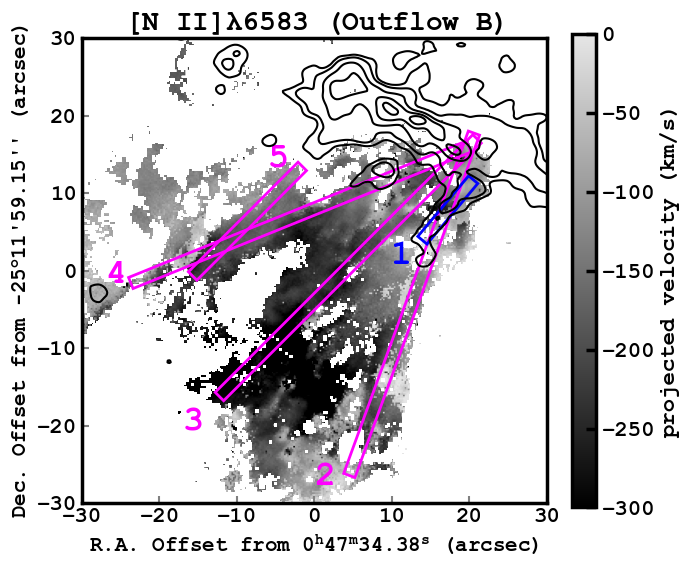

In [4]:
cmap = cmr.get_sub_cmap('gray', 0, 0.9)

# ============================================================================================================
# ============================================================================================================
CO21_cube = SpectralCube.read(COfilename)
CO21 = CO21_cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restfreq)  
CO21_chan = CO21[53,:,:].to_value()
CO21w = CO21[0,:,:].wcs

CO_cube_new = fits.PrimaryHDU(data=CO21_chan, header=CO21w.to_header())
CO_array, footprint = reproject_interp(CO_cube_new, wcs.WCS(NII.header, naxis=2).celestial, 
                                       shape_out=(y,x))

plt.figure(figsize=(7,7))

# ============================================================================================================
# ============================================================================================================

ax = plt.subplot(1, 1, 1)
im = ax.imshow(NII_vels_blue_3D[0,:,:], origin='lower', vmin=-300, vmax=0, cmap=cmap, extent=extent)
ax.set_title('', fontsize=18)
ax.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='gray')
ax.set_xlabel('R.A.', fontsize=20)
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
# ax.set_facecolor('black')

rect2 = pv_path_to_rectangle(path2NII, NII, 2, 1, width_NII, length2_NII, pa2-180, 0.2, color='magenta',
                            hatch='None')
ax.add_artist(rect2)
rect3 = pv_path_to_rectangle(path3NII, NII, 2, 1, width_NII, length3_NII, pa3-180, 0.2, color='magenta',
                            hatch='None')
ax.add_artist(rect3)
rect4 = pv_path_to_rectangle(path4NII, NII, 2, 1, width_NII, length4_NII, pa4-180, 0.2, color='magenta',
                            hatch='None')
ax.add_artist(rect4)
rect5 = pv_path_to_rectangle(path5NII, NII, 2, 1, width_NII, length5_NII, pa5-180, 0.2, 
                             color='magenta', hatch='None')
rect1 = pv_path_to_rectangle(path1NII, NII, 2, 1, width_NII, length1_NII, pa-180, 0.2, 
                             color='blue', hatch='None')
ax.add_artist(rect1)
ax.add_artist(rect5)

ax.contour(CO_array, extent=extent,linewidths=1.5,
           levels=[-0.0223731, 0.1, 0.2, 0.606325, 1.23502, 1.86372, 2.49242], 
           colors='black',zorder=4)

bar = plt.colorbar(im, fraction=0.046)
bar.set_label('projected velocity (km/s)', fontsize=16)
bar.ax.tick_params(width=2.5, labelsize=16, length=7, direction='in')

ax.set_title('[N II]$\lambda 6583$ (Outflow B)', fontsize=20)

at = AnchoredText('CO(2-1)', prop=Afontw, frameon=False, 
                  loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

ax.set_xlabel('R.A. Offset from %s (arcsec)' % ra_hms, fontsize=15)
ax.set_ylabel('Dec. Offset from %s (arcsec)' % dec_dms, fontsize=15)

# ============================================================================================================
# ============================================================================================================

x1_annotate, y1_annotate = pix_to_extent(x1_NII_SW-30, y1_NII_SW-30, NII, 2, 1, 0.2)
x2_annotate, y2_annotate = pix_to_extent(x2_NII_SW-55, y2_NII_SW-110, NII, 2, 1, 0.2)
x3_annotate, y3_annotate = pix_to_extent(x3_NII_SW-100, y3_NII_SW-100, NII, 2, 1, 0.2)
x4_annotate, y4_annotate = pix_to_extent(x4_NII_SW-120, y4_NII_SW-40, NII, 2, 1, 0.2)
x5_annotate, y5_annotate = pix_to_extent(x5_NII_SW+20, y5_NII_SW+40, NII, 2, 1, 0.2)

plt.annotate('1', xy=(x1_annotate, y1_annotate), fontsize=25, color='blue', ha='center', va='center', 
             bbox=dict(facecolor='None', edgecolor='None', boxstyle='round',alpha=0.7, pad=0.1))
plt.annotate('2', xy=(x2_annotate, y2_annotate), fontsize=25, color='magenta', ha='center', va='center',
            bbox=dict(facecolor='None', edgecolor='None', boxstyle='round',alpha=0.7, pad=0.1))
plt.annotate('3', xy=(x3_annotate, y3_annotate), fontsize=25, color='magenta', ha='center', va='center',
            bbox=dict(facecolor='None', edgecolor='None', boxstyle='round',alpha=0.7, pad=0.1))
plt.annotate('4', xy=(x4_annotate, y4_annotate), fontsize=25, color='magenta',ha='center', va='center',
            bbox=dict(facecolor='None', edgecolor='None', boxstyle='round',alpha=0.7, pad=0.1))
plt.annotate('5', xy=(x5_annotate, y5_annotate), fontsize=25, color='magenta', ha='center', va='center',
            bbox=dict(facecolor='None', edgecolor='None', boxstyle='round',alpha=0.7, pad=0.1))

# plt.subplots_adjust(wspace=12, hspace=0)
plt.tight_layout()
# plt.savefig('../../ngc253/muse/visuals/se_co_outb_final.png', bbox_inches='tight')
# plt.savefig('../../ngc253/muse/visuals/se_co_outb_final.pdf', bbox_inches='tight')
plt.show()

### CALCULATE FITS

Fit CO along slice 1.

In [5]:
# extract the slice and the spectra along the slice
savepath1 = '../../ngc253/muse/Nov28/CO/slice1'
COslice1, path1CO, spectra_list1, COspatial_axis_arcsec1, velocity_axis = take_slice.slice_extractor(COfilename,
               x1_CO_SW, y1_CO_SW, length1_CO, pa, width_CO, velocity_convention, restfreq)

# generate the text files we want
take_slice.generate_text_files(savepath1, fitnum=2)

# run the gaussian fitter to extract velocities
take_slice.velocity_extractor_2comp(savepath1, guesses_CO_SW, spectra_list1, COspatial_axis_arcsec1, 
                   velocity_axis, ContUpper, ContLower)

# grab velocities and errors from text files
CO_amps1, CO_amp_errs1, CO_vels1, CO_vel_errs1, CO_sigs1, CO_sig_errs1 = \
take_slice.extract_velocities_2comp(savepath1, which_comp='blue')

Now let's weight the velocities of [N II] by intensity.

In [14]:
# # weight the velocities by intensity
# NII_vels_blue_file = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_vel_outflow_blue.fits')
# NII_amps_blue_file = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_amp_outflow_blue.fits')
# NII_vels_blue = np.nan_to_num(NII_vels_blue_file[0].data)
# NII_amps_blue = np.nan_to_num(NII_amps_blue_file[0].data)

# # numerator to the weighted velocities; amplitude * velocity
# NII_weighted_vels = NII_amps_blue * NII_vels_blue
# hdul = fits.PrimaryHDU(data=NII_weighted_vels, header=NII.header)
# hdul.writeto('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_weightedvel_outflow_blue.fits',  overwrite=True)

# # errors on weighted velocities

In [41]:
# define the slice!
pa = 320+180  # measuring N-S

# ============================================================================================================
# ============================================================================================================
COfilename = '../../ngc253/muse/data/CO21_briggs_03aug2017_feather_SD1_newTP-flg-agr-vel2_19sep.fits'
velocity_convention = 'radio'
restfreq = 230.538 * u.GHz
ContUpper = 450
ContLower = 100

x1_CO_SW = 223.147
y1_CO_SW = 164.515

width_CO = 5.133*0.3  # pixels*arcsec/pixel
length1_CO = 34.*0.3 # pixels*arcsec/pixel

# extract the slice and the spectra along the slice
COslice1, path1CO, spectra_list1, COspatial_axis_arcsec1, velocity_axis = take_slice.slice_extractor(COfilename,
               x1_CO_SW, y1_CO_SW, length1_CO, pa, width_CO, velocity_convention, restfreq)


# ============================================================================================================
# ============================================================================================================
NII_vels_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_vel_outflow_blue.fits')
NII_vels_blue_3D = np.empty((1,NII_vels_blue[0].data.shape[0],NII_vels_blue[0].data.shape[1]))
NII_vels_blue_3D[:,:,:] = NII_vels_blue[0].data
NII_vels_cube = SpectralCube(NII_vels_blue_3D, wcs=wcs.WCS(NII))

# errors
errs_vels_blue = fits.open('../../ngc253/muse/data/output_maps/errs/ERR_ngc253_muse_se_niib_vel_outflow_blue.fits')
errs_vels_blue_3D = np.empty((1,errs_vels_blue[0].data.shape[0],errs_vels_blue[0].data.shape[1]))
errs_vels_blue_3D[:,:,:] = errs_vels_blue[0].data
errs_vels_cube = SpectralCube(errs_vels_blue_3D, wcs=wcs.WCS(NII))

# also extract the amplitudes
NII_amps_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_niib_amp_outflow_blue.fits')
NII_amps_blue_3D = np.empty((1,NII_amps_blue[0].data.shape[0],NII_amps_blue[0].data.shape[1]))
NII_amps_blue_3D[:,:,:] = NII_amps_blue[0].data
NII_amps_cube = SpectralCube(NII_amps_blue_3D, wcs=wcs.WCS(NII))

# aaaand grab the velocity model
vel_model_file = fits.open('../../ngc253/muse/data/ngc253_se_halpha_vel_model_smooth_FINAL.fits')
vel_model_3D = np.empty((1,vel_model_file[0].data.shape[0],vel_model_file[0].data.shape[1]))
vel_model_3D[:,:,:] = vel_model_file[0].data
vel_model_cube = SpectralCube(vel_model_3D, wcs=wcs.WCS(NII))

# aaaand grab the which_model cube
which_model_file = fits.open('../../ngc253/muse/Nov28/BIC_PHYS_RATIO_1p5.fits')
which_model_3D = np.empty((1,which_model_file[0].data.shape[0],which_model_file[0].data.shape[1]))
which_model_3D[:,:,:] = which_model_file[0].data
which_model_cube = SpectralCube(which_model_3D, wcs=wcs.WCS(NII))

# aaaand grab the rms cube
rms_file = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_rms.fits')
rms_3D = np.empty((1,rms_file[0].data.shape[0],rms_file[0].data.shape[1]))
rms_3D[:,:,:] = rms_file[0].data
rms_cube = SpectralCube(rms_3D, wcs=wcs.WCS(NII))

# ------------------------------------------------------------------------------------------------------------

# extract the first slice
y1_NII_SW = 257.46
x1_NII_SW = 304.04
width_NII = 7.7*0.2  # pixels*arcsec/pixel
length1_NII = 51.*0.2 # pixels*arcsec/pixel

coord1 = pixel_to_skycoord(x1_NII_SW, y1_NII_SW, wcs=wcs.WCS(NII))
path1NII = pvextractor.PathFromCenter(center=coord1,
                    length=length1_NII * u.arcsec,
                    angle=pa * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice1 = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path1NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list1 = [float(NIIslice1.data[:,i]) for i in range(NIIslice1.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg1 = wcs.WCS(NIIslice1.header).array_index_to_world_values(np.zeros(NIIslice1.shape[1]), np.arange(NIIslice1.shape[1]))
NIIspatial_axis_arcsec1 = (NIIspatial_axis_deg1[0] * u.deg).to(u.arcsec).to_value()

# # divide the vels*amps by sum of the amps
# NIIslice1_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path1NII)
# NII_amps_list1 = [float(NIIslice1_amps.data[:,i]) for i in range(NIIslice1_amps.shape[1])]
# NII_weighted_vels_list1 = np.array(NII_vels_list1) / np.sum(NII_amps_list1)


# ------------------------------------------------------------------------------------------------------------
y2_NII_SW = 195
x2_NII_SW = 280

pa2 = 340+180  # measuring N-S
length2_NII = 235.*0.2 # pixels*arcsec/pixel

coord2 = pixel_to_skycoord(x2_NII_SW, y2_NII_SW, wcs=wcs.WCS(NII))
path2NII = pvextractor.PathFromCenter(center=coord2,
                    length=length2_NII * u.arcsec,
                    angle=pa2 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice2_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path2NII)
NIIslice2_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path2NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list2 = [float(NIIslice2_vels.data[:,i]) for i in range(NIIslice2_vels.shape[1])]
NII_fwhm_list2 = [float(NIIslice2_fwhm.data[:,i]) for i in range(NIIslice2_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg2 = wcs.WCS(NIIslice2_vels.header).array_index_to_world_values(np.zeros(NIIslice2_vels.shape[1]), np.arange(NIIslice2_vels.shape[1]))
NIIspatial_axis_arcsec2 = (NIIspatial_axis_deg2[0] * u.deg).to(u.arcsec).to_value()

# # divide the vels*amps by sum of the amps
# NIIslice2_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path2NII)
# NII_amps_list2 = [float(NIIslice2_amps.data[:,i]) for i in range(NIIslice2_amps.shape[1])]
# NII_weighted_vels_list2 = np.array(NII_vels_list2) / np.sum(NII_amps_list2)


# ------------------------------------------------------------------------------------------------------------
y3_NII_SW = 220
x3_NII_SW = 240

pa3 = 315+180  # measuring N-S
length3_NII = 235.*0.2 # pixels*arcsec/pixel

coord3 = pixel_to_skycoord(x3_NII_SW, y3_NII_SW, wcs=wcs.WCS(NII))
path3NII = pvextractor.PathFromCenter(center=coord3,
                    length=length3_NII * u.arcsec,
                    angle=pa3 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice3_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path3NII)
NIIslice3_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path3NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list3 = [float(NIIslice3_vels.data[:,i]) for i in range(NIIslice3_vels.shape[1])]
NII_fwhm_list3 = [float(NIIslice3_fwhm.data[:,i]) for i in range(NIIslice3_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg3 = wcs.WCS(NIIslice3_vels.header).array_index_to_world_values(np.zeros(NIIslice3_vels.shape[1]), np.arange(NIIslice3_vels.shape[1]))
NIIspatial_axis_arcsec3 = (NIIspatial_axis_deg3[0] * u.deg).to(u.arcsec).to_value()


# # divide the vels*amps by sum of the amps
# NIIslice3_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path3NII)
# NII_amps_list3 = [float(NIIslice3_amps.data[:,i]) for i in range(NIIslice3_amps.shape[1])]
# NII_weighted_vels_list3 = np.array(NII_vels_list3) / np.sum(NII_amps_list3)

# ------------------------------------------------------------------------------------------------------------
y4_NII_SW = 255
x4_NII_SW = 210

length4_NII = 235.*0.2 # pixels*arcsec/pixel
pa4 = 292+180  # measuring N-S

coord4 = pixel_to_skycoord(x4_NII_SW, y4_NII_SW, wcs=wcs.WCS(NII))
path4NII = pvextractor.PathFromCenter(center=coord4,
                    length=length4_NII * u.arcsec,
                    angle=pa4 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice4_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path4NII)
NIIslice4_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path4NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list4 = [float(NIIslice4_vels.data[:,i]) for i in range(NIIslice4_vels.shape[1])]
NII_fwhm_list4 = [float(NIIslice4_fwhm.data[:,i]) for i in range(NIIslice4_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg4 = wcs.WCS(NIIslice4_vels.header).array_index_to_world_values(np.zeros(NIIslice4_vels.shape[1]), np.arange(NIIslice4_vels.shape[1]))
NIIspatial_axis_arcsec4 = (NIIspatial_axis_deg4
                           [0] * u.deg).to(u.arcsec).to_value()

# # divide the vels*amps by sum of the amps
# NIIslice4_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path4NII)
# NII_amps_list4 = [float(NIIslice4_amps.data[:,i]) for i in range(NIIslice4_amps.shape[1])]
# NII_weighted_vels_list4 = np.array(NII_vels_list4) / np.sum(NII_amps_list4)

# ------------------------------------------------------------------------------------------------------------
y5_NII_SW = 250
x5_NII_SW = 175

pa5 = 315+180  # measuring N-S
length5_NII = 100.*0.2 # pixels*arcsec/pixel

coord5 = pixel_to_skycoord(x5_NII_SW, y5_NII_SW, wcs=wcs.WCS(NII))
path5NII = pvextractor.PathFromCenter(center=coord5,
                    length=length5_NII * u.arcsec,
                    angle=pa5 * u.deg,
                    width=width_NII*u.arcsec)  # 10 pixels wide    
NIIslice5_vels = pvextractor.extract_pv_slice(cube=NII_vels_cube, path=path5NII)
NIIslice5_fwhm = pvextractor.extract_pv_slice(cube=NII_fwhm_cube, path=path5NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
NII_vels_list5 = [float(NIIslice5_vels.data[:,i]) for i in range(NIIslice5_vels.shape[1])]
NII_fwhm_list5 = [float(NIIslice5_fwhm.data[:,i]) for i in range(NIIslice5_fwhm.shape[1])]

# grab the spatial axis of the PV slice and convert from degrees to arcsec
NIIspatial_axis_deg5 = wcs.WCS(NIIslice5_vels.header).array_index_to_world_values(np.zeros(NIIslice5_vels.shape[1]), np.arange(NIIslice5_vels.shape[1]))
NIIspatial_axis_arcsec5 = (NIIspatial_axis_deg5
                           [0] * u.deg).to(u.arcsec).to_value()

# # divide the vels*amps by sum of the amps
# NIIslice5_amps = pvextractor.extract_pv_slice(cube=NII_amps_cube, path=path5NII)
# NII_amps_list5 = [float(NIIslice5_amps.data[:,i]) for i in range(NIIslice5_amps.shape[1])]
# NII_weighted_vels_list5 = np.array(NII_vels_list5) / np.sum(NII_amps_list5)


# ============================================================================================================
# ============================================================================================================
# also extract from the halpha for the ha/hb ratio
Ha_amps_blue = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_ha_amp_outflow_blue.fits')
Ha_amps_blue_3D = np.empty((1,Ha_amps_blue[0].data.shape[0],Ha_amps_blue[0].data.shape[1]))
Ha_amps_blue_3D[:,:,:] = Ha_amps_blue[0].data
Ha_amps_blue_cube = SpectralCube(Ha_amps_blue_3D, wcs=wcs.WCS(NII))

Ha_amps_disk = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_ha_amp_disk.fits')
Ha_amps_disk_3D = np.empty((1,Ha_amps_disk[0].data.shape[0],Ha_amps_disk[0].data.shape[1]))
Ha_amps_disk_3D[:,:,:] = Ha_amps_disk[0].data
Ha_amps_disk_cube = SpectralCube(Ha_amps_disk_3D, wcs=wcs.WCS(NII))

Ha_amps_red = fits.open('../../ngc253/muse/data/output_maps/ngc253_muse_se_ha_amp_outflow_red.fits')
Ha_amps_red_3D = np.empty((1,Ha_amps_red[0].data.shape[0],Ha_amps_red[0].data.shape[1]))
Ha_amps_red_3D[:,:,:] = Ha_amps_red[0].data
Ha_amps_red_cube = SpectralCube(Ha_amps_red_3D, wcs=wcs.WCS(NII))

# slice1
Ha_slice1_blue = pvextractor.extract_pv_slice(cube=Ha_amps_blue_cube, path=path1NII)
Ha_list1_blue = [float(Ha_slice1_blue.data[:,i]) for i in range(Ha_slice1_blue.shape[1])]
Ha_slice1_disk = pvextractor.extract_pv_slice(cube=Ha_amps_disk_cube, path=path1NII)
Ha_list1_disk = [float(Ha_slice1_disk.data[:,i]) for i in range(Ha_slice1_disk.shape[1])]
Ha_slice1_red = pvextractor.extract_pv_slice(cube=Ha_amps_red_cube, path=path1NII)
Ha_list1_red = [float(Ha_slice1_red.data[:,i]) for i in range(Ha_slice1_red.shape[1])]

# slice2
Ha_slice2_blue = pvextractor.extract_pv_slice(cube=Ha_amps_blue_cube, path=path2NII)
Ha_list2_blue = [float(Ha_slice2_blue.data[:,i]) for i in range(Ha_slice2_blue.shape[1])]
Ha_slice2_disk = pvextractor.extract_pv_slice(cube=Ha_amps_disk_cube, path=path2NII)
Ha_list2_disk = [float(Ha_slice2_disk.data[:,i]) for i in range(Ha_slice2_disk.shape[1])]
Ha_slice2_red = pvextractor.extract_pv_slice(cube=Ha_amps_red_cube, path=path2NII)
Ha_list2_red = [float(Ha_slice2_red.data[:,i]) for i in range(Ha_slice2_red.shape[1])]

# slice3
Ha_slice3_blue = pvextractor.extract_pv_slice(cube=Ha_amps_blue_cube, path=path3NII)
Ha_list3_blue = [float(Ha_slice3_blue.data[:,i]) for i in range(Ha_slice3_blue.shape[1])]
Ha_slice3_disk = pvextractor.extract_pv_slice(cube=Ha_amps_disk_cube, path=path3NII)
Ha_list3_disk = [float(Ha_slice3_disk.data[:,i]) for i in range(Ha_slice3_disk.shape[1])]
Ha_slice3_red = pvextractor.extract_pv_slice(cube=Ha_amps_red_cube, path=path3NII)
Ha_list3_red = [float(Ha_slice3_red.data[:,i]) for i in range(Ha_slice3_red.shape[1])]

# slice4
Ha_slice4_blue = pvextractor.extract_pv_slice(cube=Ha_amps_blue_cube, path=path4NII)
Ha_list4_blue = [float(Ha_slice4_blue.data[:,i]) for i in range(Ha_slice4_blue.shape[1])]
Ha_slice4_disk = pvextractor.extract_pv_slice(cube=Ha_amps_disk_cube, path=path4NII)
Ha_list4_disk = [float(Ha_slice4_disk.data[:,i]) for i in range(Ha_slice4_disk.shape[1])]
Ha_slice4_red = pvextractor.extract_pv_slice(cube=Ha_amps_red_cube, path=path4NII)
Ha_list4_red = [float(Ha_slice4_red.data[:,i]) for i in range(Ha_slice4_red.shape[1])]

# slice5
Ha_slice5_blue = pvextractor.extract_pv_slice(cube=Ha_amps_blue_cube, path=path5NII)
Ha_list5_blue = [float(Ha_slice5_blue.data[:,i]) for i in range(Ha_slice5_blue.shape[1])]
Ha_slice5_disk = pvextractor.extract_pv_slice(cube=Ha_amps_disk_cube, path=path5NII)
Ha_list5_disk = [float(Ha_slice5_disk.data[:,i]) for i in range(Ha_slice5_disk.shape[1])]
Ha_slice5_red = pvextractor.extract_pv_slice(cube=Ha_amps_red_cube, path=path5NII)
Ha_list5_red = [float(Ha_slice5_red.data[:,i]) for i in range(Ha_slice5_red.shape[1])]

# ============================================================================================================
# ============================================================================================================
# also extract from the which_model cube
which_model_slice1 = pvextractor.extract_pv_slice(cube=which_model_cube, path=path1NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
# round to get whole number for the averaged model number
which_model_list1 = np.round([float(which_model_slice1.data[:,i]) for i in range(which_model_slice1.shape[1])])

# and do again for the adjacent slice
which_model_slice2 = pvextractor.extract_pv_slice(cube=which_model_cube, path=path2NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
which_model_list2 = np.round([float(which_model_slice2.data[:,i]) for i in range(which_model_slice2.shape[1])])

# slice 3
which_model_slice3 = pvextractor.extract_pv_slice(cube=which_model_cube, path=path3NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
which_model_list3 = np.round([float(which_model_slice3.data[:,i]) for i in range(which_model_slice3.shape[1])])

# slice 4
which_model_slice4 = pvextractor.extract_pv_slice(cube=which_model_cube, path=path4NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
which_model_list4 = np.round([float(which_model_slice4.data[:,i]) for i in range(which_model_slice4.shape[1])])

# slice 5
which_model_slice5 = pvextractor.extract_pv_slice(cube=which_model_cube, path=path5NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
which_model_list5 = np.round([float(which_model_slice5.data[:,i]) for i in range(which_model_slice5.shape[1])])


# ============================================================================================================
# ============================================================================================================
# aaaaaaaaand from the rms cube
rms_slice1 = pvextractor.extract_pv_slice(cube=rms_cube, path=path1NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
rms_list1 = [float(rms_slice1.data[:,i]) for i in range(rms_slice1.shape[1])]

# and do again for the adjacent slice
rms_slice2 = pvextractor.extract_pv_slice(cube=rms_cube, path=path2NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
rms_list2 = [float(rms_slice2.data[:,i]) for i in range(rms_slice2.shape[1])]

# slice 3
rms_slice3 = pvextractor.extract_pv_slice(cube=rms_cube, path=path3NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
rms_list3 = [float(rms_slice3.data[:,i]) for i in range(rms_slice3.shape[1])]

# slice 4
rms_slice4 = pvextractor.extract_pv_slice(cube=rms_cube, path=path4NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
rms_list4 = [float(rms_slice4.data[:,i]) for i in range(rms_slice4.shape[1])]

# slice 5
rms_slice5 = pvextractor.extract_pv_slice(cube=rms_cube, path=path5NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
rms_list5 = [float(rms_slice5.data[:,i]) for i in range(rms_slice5.shape[1])]

# ============================================================================================================
# ============================================================================================================
# also extract from the vel_model cube
vel_model_slice1 = pvextractor.extract_pv_slice(cube=vel_model_cube, path=path1NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
# round to get whole number for the averaged model number
vel_model_list1 = np.round([float(vel_model_slice1.data[:,i]) for i in range(vel_model_slice1.shape[1])])

# and do again for the adjacent slice
vel_model_slice2 = pvextractor.extract_pv_slice(cube=vel_model_cube, path=path2NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
vel_model_list2 = np.round([float(vel_model_slice2.data[:,i]) for i in range(vel_model_slice2.shape[1])])

# slice 3
vel_model_slice3 = pvextractor.extract_pv_slice(cube=vel_model_cube, path=path3NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
vel_model_list3 = np.round([float(vel_model_slice3.data[:,i]) for i in range(vel_model_slice3.shape[1])])

# slice 4
vel_model_slice4 = pvextractor.extract_pv_slice(cube=vel_model_cube, path=path4NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
vel_model_list4 = np.round([float(vel_model_slice4.data[:,i]) for i in range(vel_model_slice4.shape[1])])

# slice 5
vel_model_slice5 = pvextractor.extract_pv_slice(cube=vel_model_cube, path=path5NII)

# grab each spectrum along the transverse axis (i.e., along the length of the slice)
vel_model_list5 = np.round([float(vel_model_slice5.data[:,i]) for i in range(vel_model_slice5.shape[1])])

# ============================================================================================================
# Errors!
# ============================================================================================================

# we want correct propagation of errors when slicing the error cubes
# but pvextractor will take the average along the width. So, we can 
# square all the errors. Then, let pvextractor take an average.
# We can convert that to just the sum by multiplying by width size N,
# or the number of pixels that is being averaged. Finally, we will
# take the square root of that answer.

# slice 1
errs_vels_slice1 = pvextractor.extract_pv_slice(cube=errs_vels_cube**2, path=path1NII)
errs_vels_list1 = [float(vel_errs_slice1.data[:,i]) for i in range(errs_vels_slice1.shape[1])]
prop_errs_vels_arr1 = np.sqrt(np.array(errs_vels_list1)*width_NII)

# slice 2
errs_vels_slice2 = pvextractor.extract_pv_slice(cube=errs_vels_cube**2, path=path2NII)
errs_vels_list2 = [float(errs_vels_slice2.data[:,i]) for i in range(errs_vels_slice2.shape[1])]
prop_errs_vels_arr2 = np.sqrt(np.array(errs_vels_list2)*width_NII)

# slice 3
errs_vels_slice3 = pvextractor.extract_pv_slice(cube=errs_vels_cube**2, path=path3NII)
errs_vels_list3 = [float(errs_vels_slice3.data[:,i]) for i in range(errs_vels_slice3.shape[1])]
prop_errs_vels_arr3 = np.sqrt(np.array(errs_vels_list3)*width_NII)

# slice 4
errs_vels_slice4 = pvextractor.extract_pv_slice(cube=errs_vels_cube**2, path=path4NII)
errs_vels_list4 = [float(errs_vels_slice4.data[:,i]) for i in range(errs_vels_slice4.shape[1])]
prop_errs_vels_arr4 = np.sqrt(np.array(errs_vels_list4)*width_NII)

# slice 5
errs_vels_slice5 = pvextractor.extract_pv_slice(cube=errs_vels_cube**2, path=path5NII)
errs_vels_list5 = [float(errs_vels_slice5.data[:,i]) for i in range(errs_vels_slice5.shape[1])]
prop_errs_vels_arr5 = np.sqrt(np.array(errs_vels_list5)*width_NII)


In [16]:
from scipy import stats
Vsys = 243.

NII slope from 1.5 - 4 arcsec is 2.45928298559493


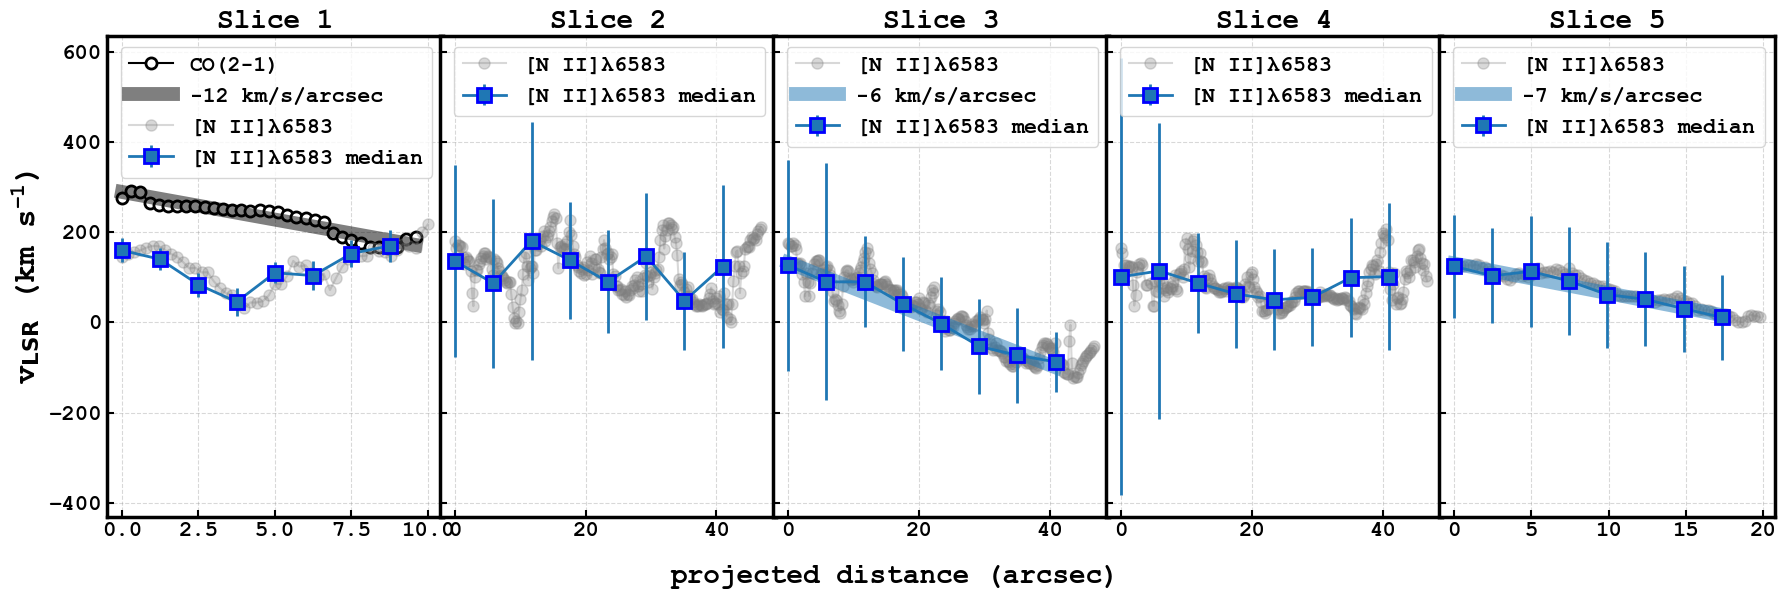

In [52]:
# want to convert CO radio to optical velocities.
restfreq = 4861.363
opt_doppler_equiv = u.doppler_optical(restfreq * u.AA)  # equivalencies
rad_doppler_equiv = u.doppler_radio(restfreq * u.AA)

f, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(1, 5, figsize=(18, 6), 
                                                           sharex=False, sharey='row')

# ==============================================================================
# SLICE 1
# ==============================================================================

### CO ###
# inds_fit_lim = (COspatial_axis_arcsec1 > 1.5) & (COspatial_axis_arcsec1 < 4.)  # limit for just fitting
# CO_vels_Vsys1 = (np.array(CO_vels1) - Vsys_sw) * u.km/u.s
CO_vels_Vsys1 = (np.array(CO_vels1)) * u.km/u.s
freq_arr = CO_vels_Vsys1.to(u.GHz, rad_doppler_equiv)  # get radio frequencies 
CO_opt_vels_Vsys1 = freq_arr.to(u.km / u.s, equivalencies=opt_doppler_equiv)  # convert radio freq -> opt vel 

m1,b1 = np.polyfit(COspatial_axis_arcsec1, CO_opt_vels_Vsys1, 1) # best fit line
ax1.plot(COspatial_axis_arcsec1, CO_opt_vels_Vsys1, 'ok-', markeredgecolor='black', 
         ms=8, mew=2, label='CO(2-1)',markerfacecolor='white')
ax1.plot(COspatial_axis_arcsec1, m1*COspatial_axis_arcsec1+b1,color='black',lw=10,alpha=0.5,
        label='%s km/s/arcsec' % int(np.round(m1,0)))

### NII ###

# inds_fit_lim = (NIIspatial_axis_arcsec1 > 1.5) & (NIIspatial_axis_arcsec1 < 4.)  # limit for just fitting
NII_sw_vels_Vsys1 = np.array(NII_vels_list1) + Vsys
bin_means1, bin_edges1, _ = stats.binned_statistic(NIIspatial_axis_arcsec1, 
                            NII_sw_vels_Vsys1, statistic='median', bins=8, range=None)
bin_errs1, _, _ = stats.binned_statistic(NIIspatial_axis_arcsec1, 
                            prop_errs_vels_arr1**2, statistic='median', bins=8, range=None)
bin_errs1 = np.sqrt(bin_errs1*8)  # N_bins = 8, properly propagating the errors!

m1,b1 = np.polyfit(bin_edges1[:-1],bin_means1, 1) # best fit line

ax1.plot(NIIspatial_axis_arcsec1, NII_sw_vels_Vsys1, 'o-', 
         ms=8,alpha=0.3, color='tab:gray',label='[N II]$\lambda 6583$')
ax1.errorbar(bin_edges1[:-1], bin_means1, bin_errs1, marker='s', markeredgecolor='blue', ms=10, mew=2,
         label='[N II]$\lambda 6583$ median', color='tab:blue',lw=2)

ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax1.grid(ls='--',color='gray', alpha=0.3)
ax1.set_ylabel('v$_\mathrm{LSR}$ (km s$^{-1}$)', fontsize=22)
# ax1.set_ylim(-400,20)
ax1.legend(fontsize=15.5)
print('NII slope from 1.5 - 4 arcsec is', m1)

ax1.set_title('Slice 1', fontsize=20)

# ==============================================================================
# SLICE 2
# ==============================================================================
NII_sw_vels_Vsys2 = np.array(NII_vels_list2) + Vsys
bin_means2, bin_edges2, _ = stats.binned_statistic(NIIspatial_axis_arcsec2, 
                            NII_sw_vels_Vsys2, statistic='mean', bins=8, range=None)

bin_errs2, _, _ = stats.binned_statistic(NIIspatial_axis_arcsec2, 
                            prop_errs_vels_arr2**2, statistic='median', bins=8, range=None)
bin_errs2 = np.sqrt(bin_errs2*8)  # N_bins = 8, properly propagating the errors!

m2,b2 = np.polyfit(bin_means2, bin_edges2[:-1], 1) # best fit line

ax2.plot(NIIspatial_axis_arcsec2, NII_sw_vels_Vsys2, 'o-', 
         ms=8,alpha=0.3, color='tab:gray', label='[N II]$\lambda 6583$')
ax2.errorbar(bin_edges2[:-1], bin_means2, bin_errs2, marker='s', markeredgecolor='blue', ms=10, mew=2,
         label='[N II]$\lambda 6583$ median', color='tab:blue',lw=2)

ax2.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax2.grid(ls='--',color='gray', alpha=0.3)
ax2.set_title('Slice 2', fontsize=20)
ax2.legend(fontsize=15.5)

# ==============================================================================
# SLICE 3
# ==============================================================================
NII_sw_vels_Vsys3 = np.array(NII_vels_list3) + Vsys
bin_means3, bin_edges3, _ = stats.binned_statistic(NIIspatial_axis_arcsec3, 
                            NII_sw_vels_Vsys3, statistic='mean', bins=8, range=None)
bin_errs3, _, _ = stats.binned_statistic(NIIspatial_axis_arcsec3, 
                            prop_errs_vels_arr3**2, statistic='median', bins=8, range=None)
bin_errs3 = np.sqrt(bin_errs3*8)  # N_bins = 8, properly propagating the errors!

m3,b3 = np.polyfit(bin_edges3[:-1], bin_means3, 1) # best fit line
ax3.plot(NIIspatial_axis_arcsec3, NII_sw_vels_Vsys3, 'o-', 
         ms=8,alpha=0.3, color='tab:gray',label='[N II]$\lambda 6583$')
ax3.errorbar(bin_edges3[:-1], bin_means3, bin_errs3, marker='s', markeredgecolor='blue', ms=10, mew=2,
         label='[N II]$\lambda 6583$ median', color='tab:blue',lw=2)
ax3.plot(bin_edges3[:-1], m3*bin_edges3[:-1]+b3,color='tab:blue',lw=10,alpha=0.5,
        label='%s km/s/arcsec' % int(np.round(m3,0)))

ax3.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax3.grid(ls='--',color='gray', alpha=0.3)
ax3.set_title('Slice 3', fontsize=20)
ax3.legend(fontsize=15.5)

# ==============================================================================
# SLICE 4
# ==============================================================================
NII_sw_vels_Vsys4_finite = np.array(NII_vels_list4)[np.isfinite(NII_vels_list4)] + Vsys
NIIspatial_axis_arcsec4_finite = NIIspatial_axis_arcsec4[np.isfinite(NII_vels_list4)]

bin_means4, bin_edges4, _ = stats.binned_statistic(NIIspatial_axis_arcsec4_finite, 
                            NII_sw_vels_Vsys4_finite, statistic='mean', bins=8, range=None)
bin_errs4, _, _ = stats.binned_statistic(NIIspatial_axis_arcsec4, 
                            prop_errs_vels_arr4**2, statistic='median', bins=8, range=None)
bin_errs4 = np.sqrt(bin_errs4*8)  # N_bins = 8, properly propagating the errors!

m4,b4 = np.polyfit(bin_edges4[:-1], bin_means4, 1) # best fit line
ax4.plot(NIIspatial_axis_arcsec4_finite, NII_sw_vels_Vsys4_finite, 'o-', 
         ms=8,alpha=0.3, color='tab:gray',label='[N II]$\lambda 6583$')
ax4.errorbar(bin_edges4[:-1], bin_means4, bin_errs4, marker='s', markeredgecolor='blue', ms=10, mew=2,
         label='[N II]$\lambda 6583$ median', color='tab:blue',lw=2)

ax4.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax4.grid(ls='--',color='gray', alpha=0.3)
ax4.set_title('Slice 4', fontsize=20)
ax4.legend(fontsize=15.5)

# ==============================================================================
# SLICE 5
# ==============================================================================
NII_sw_vels_Vsys5 = np.array(NII_vels_list5) + Vsys
bin_means5, bin_edges5, _ = stats.binned_statistic(NIIspatial_axis_arcsec5, 
                            NII_sw_vels_Vsys5, statistic='mean', bins=8, range=None)
bin_errs5, _, _ = stats.binned_statistic(NIIspatial_axis_arcsec5, 
                            prop_errs_vels_arr5**2, statistic='median', bins=8, range=None)
bin_errs5 = np.sqrt(bin_errs5*8)  # N_bins = 8, properly propagating the errors!

m5,b5 = np.polyfit(bin_edges5[:-1], bin_means5, 1) # best fit line
ax5.plot(NIIspatial_axis_arcsec5, NII_sw_vels_Vsys5, 'o-', 
         ms=8,alpha=0.3, color='tab:gray', label='[N II]$\lambda 6583$')
ax5.errorbar(bin_edges5[:-1], bin_means5, bin_errs5, marker='s', markeredgecolor='blue', ms=10, mew=2,
         label='[N II]$\lambda 6583$ median', color='tab:blue',lw=2)
ax5.plot(bin_edges5[:-1], m5*bin_edges5[:-1]+b5,color='tab:blue',lw=10,alpha=0.5,
        label='%s km/s/arcsec' % int(np.round(m5,0)))

ax5.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax5.grid(ls='--',color='gray', alpha=0.3)
ax5.set_title('Slice 5', fontsize=20)
ax5.legend(fontsize=15.5)

# ==============================================================================
# ==============================================================================
f.supxlabel('projected distance (arcsec)', fontsize=20, family='courier new', weight='bold', style='normal')
plt.tight_layout()
plt.subplots_adjust(hspace=-0.01, wspace=-0.01)
# plt.savefig('../../ngc253/muse/visuals/co_vs_nii.png', bbox_inches='tight', dpi=200)
# plt.savefig('../../ngc253/muse/visuals/co_vs_nii.pdf', bbox_inches='tight', dpi=200)
plt.show()

### Run the fits for Hbeta

In [ ]:
Vsys = 243.
c = 3*10**5

In [ ]:
# rms / sqrt(2) = rms of what would be a line

# sqrt(2)*deltav (2 angstroms) * sigma = integrated intensity limit (1 sigma limit)

# we don't see the line at this limit]

# take the ratio, then this is a lower limit

In [ ]:
def run_HB_fits(HBslice, guesses, spectra_list, spatial_axis_arcsec, vel_axis, savepath1, savepath2, savepath3):
    

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # FIT 1
    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    
    print('One component....')
    
    # generate the text files we want
    take_slice.generate_text_files(savepath1, fitnum=1)

    # do the fitting
    take_slice.velocity_extractor_1comp(savepath1, guesses, spectra_list, spatial_axis_arcsec, 
                             vel_axis, 4860, 4850, subcont=True)

    # grab velocities and errors from text files
    amp_fit1_disk, amperrs_fit1_disk, _, _, _, _ = \
    take_slice.extract_velocities_1comp(savepath1)

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # FIT 2
    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    
    print('Two components....')
    
    # generate the text files we want
    take_slice.generate_text_files(savepath2, fitnum=2)

    # do the fitting
    take_slice.velocity_extractor_2comp(savepath2, guesses, spectra_list, spatial_axis_arcsec, 
                             vel_axis, 4860, 4850, subcont=True)

    # grab velocities and errors from text files
    amp_fit2_disk, amperrs_fit2_disk, _, _, _, _ = \
    take_slice.extract_velocities_2comp(savepath2, which_comp='disk')

    # grab velocities and errors from text files
    amp_fit2_blue, amperrs_fit2_blue, _, _, _, _ = \
    take_slice.extract_velocities_2comp(savepath2, which_comp='blue')

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # FIT 3
    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    
    print('Three components....')
    
    # generate the text files we want
    take_slice.generate_text_files(savepath3, fitnum=3)

    # do the fitting
    take_slice.velocity_extractor_3comp(savepath3, guesses, spectra_list, spatial_axis_arcsec, 
                             vel_axis, 4860, 4850, subcont=True)

    # grab velocities and errors from text files
    amp_fit3_disk, amperrs_fit3_disk, _, _, _, _ = \
    take_slice.extract_velocities_3comp(savepath3, which_comp = 'disk')

    # grab velocities and errors from text files
    amp_fit3_blue, amperrs_fit3_blue, _, _, _, _ = \
    take_slice.extract_velocities_3comp(savepath3, which_comp='blue')
    
    # grab velocities and errors from text files
    amp_fit3_red, amperrs_fit3_red, _, _, _, _ = \
    take_slice.extract_velocities_3comp(savepath3, which_comp='red')

    return(amp_fit1_disk, amp_fit2_blue, amp_fit2_disk, amp_fit3_blue, amp_fit3_disk, amp_fit3_red)

In [ ]:
fit_HB = False
if fit_HB == True:
    HB_cube = SpectralCube.read(NIIfilename, hdu=1).spectral_slab(4800 * u.AA, 5000 * u.AA)

    # slice 1
    print('Slice 1')
    HBslice1, path1HB, spectra_listHB, HBspatial_axis_arcsec1, HB_vel_axis = take_slice.slice_extractor(HB_cube,
                   x1_NII_SW, y1_NII_SW, length1_NII, pa, width_NII, 'optical', restwvl)

    HB_slice1_fit1_amp_disk, HB_slice1_fit2_amp_blue, HB_slice1_fit2_amp_disk, \
    HB_slice1_fit3_amp_blue, HB_slice1_fit3_amp_disk, HB_slice1_fit3_amp_red = \
        run_HB_fits(HBslice1, guesses_HB1, spectra_listHB, HBspatial_axis_arcsec1, HB_vel_axis, 
                    savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice1', 
                    savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice1', 
                    savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice1')

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # slice 2
    print('Slice 2')
    HBslice2, path2HB, spectra_listHB, HBspatial_axis_arcsec2, HB_vel_axis = take_slice.slice_extractor(HB_cube,
                   x2_NII_SW, y2_NII_SW, length2_NII, pa2, width_NII, 'optical', restwvl)

    HB_slice2_fit1_amp_disk, HB_slice2_fit2_amp_blue, HB_slice2_fit2_amp_disk, \
    HB_slice2_fit3_amp_blue, HB_slice2_fit3_amp_disk, HB_slice2_fit3_amp_red = \
        run_HB_fits(HBslice2, guesses_HB2, spectra_listHB, HBspatial_axis_arcsec2, HB_vel_axis, 
                    savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice2', 
                    savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice2', 
                    savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice2')

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # slice 3
    print('Slice 3')
    HBslice3, path3HB, spectra_listHB, HBspatial_axis_arcsec3, HB_vel_axis = take_slice.slice_extractor(HB_cube,
                   x3_NII_SW, y3_NII_SW, length3_NII, pa3, width_NII, 'optical', restwvl)

    HB_slice3_fit1_amp_disk, HB_slice3_fit2_amp_blue, HB_slice3_fit2_amp_disk, \
    HB_slice3_fit3_amp_blue, HB_slice3_fit3_amp_disk, HB_slice3_fit3_amp_red = \
        run_HB_fits(HBslice3, guesses_HB2, spectra_listHB, HBspatial_axis_arcsec3, HB_vel_axis, 
                    savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice3', 
                    savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice3', 
                    savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice3')

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # slice 4
    print('Slice 4')
    HBslice4, path4HB, spectra_listHB, HBspatial_axis_arcsec4, HB_vel_axis = take_slice.slice_extractor(HB_cube,
                   x4_NII_SW, y4_NII_SW, length4_NII, pa4, width_NII, 'optical', restwvl)

    HB_slice4_fit1_amp_disk, HB_slice4_fit2_amp_blue, HB_slice4_fit2_amp_disk, \
    HB_slice4_fit3_amp_blue, HB_slice4_fit3_amp_disk, HB_slice4_fit3_amp_red = \
        run_HB_fits(HBslice4, guesses_HB2, spectra_listHB, HBspatial_axis_arcsec4, HB_vel_axis, 
                    savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice4', 
                    savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice4', 
                    savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice4')

    # === === === === === === === === === === === === === === === === === === === === === === === === === ===
    # slice 5
    print('Slice 5')
    HBslice5, path5HB, spectra_listHB, HBspatial_axis_arcsec5, HB_vel_axis = take_slice.slice_extractor(HB_cube,
                   x5_NII_SW, y5_NII_SW, length5_NII, pa5, width_NII, 'optical', restwvl)

    HB_slice5_fit1_amp_disk, HB_slice5_fit2_amp_blue, HB_slice5_fit2_amp_disk, \
    HB_slice5_fit3_amp_blue, HB_slice5_fit3_amp_disk, HB_slice5_fit3_amp_red = \
        run_HB_fits(HBslice5, guesses_HB5, spectra_listHB, HBspatial_axis_arcsec5, HB_vel_axis, 
                    savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice5', 
                    savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice5', 
                    savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice5')

In [11]:
def data_arrs(savepath1, savepath2, savepath3):
    
    # run IF the above didn't produce the proper numpy arrays
    # grab velocities and errors from text files
    
    amp_fit1_disk, amperrs_fit1_disk, _, _, _, _ = take_slice.extract_velocities_1comp(savepath1)

    amp_fit2_disk, amperrs_fit2_disk, _, _, _, _ = take_slice.extract_velocities_2comp(savepath2, which_comp='disk')
    amp_fit2_blue, amperrs_fit2_blue, _, _, _, _ = take_slice.extract_velocities_2comp(savepath2, which_comp='blue')

    amp_fit3_disk, amperrs_fit3_disk, _, _, _, _ = take_slice.extract_velocities_3comp(savepath3, which_comp = 'disk')
    amp_fit3_blue, amperrs_fit3_blue, _, _, _, _ = take_slice.extract_velocities_3comp(savepath3, which_comp='blue')
    amp_fit3_red, amperrs_fit3_red, _, _, _, _ = take_slice.extract_velocities_3comp(savepath3, which_comp='red')
    
    return(amp_fit1_disk, amp_fit2_blue, amp_fit2_disk, amp_fit3_blue, amp_fit3_disk, amp_fit3_red)

In [12]:
HB_slice1_fit1_amp_disk, HB_slice1_fit2_amp_blue, HB_slice1_fit2_amp_disk, \
HB_slice1_fit3_amp_blue, HB_slice1_fit3_amp_disk, HB_slice1_fit3_amp_red \
= data_arrs(savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice1', 
          savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice1',
          savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice1')

HB_slice2_fit1_amp_disk, HB_slice2_fit2_amp_blue, HB_slice2_fit2_amp_disk, \
HB_slice2_fit3_amp_blue, HB_slice2_fit3_amp_disk, HB_slice2_fit3_amp_red \
= data_arrs(savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice2', 
          savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice2',
          savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice2')

HB_slice3_fit1_amp_disk, HB_slice3_fit2_amp_blue, HB_slice3_fit2_amp_disk, \
HB_slice3_fit3_amp_blue, HB_slice3_fit3_amp_disk, HB_slice3_fit3_amp_red \
= data_arrs(savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice3', 
          savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice3',
          savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice3')

HB_slice4_fit1_amp_disk, HB_slice4_fit2_amp_blue, HB_slice4_fit2_amp_disk, \
HB_slice4_fit3_amp_blue, HB_slice4_fit3_amp_disk, HB_slice4_fit3_amp_red \
= data_arrs(savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice4', 
          savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice4',
          savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice4')

HB_slice5_fit1_amp_disk, HB_slice5_fit2_amp_blue, HB_slice5_fit2_amp_disk, \
HB_slice5_fit3_amp_blue, HB_slice5_fit3_amp_disk, HB_slice5_fit3_amp_red \
= data_arrs(savepath1='../../ngc253/muse/Nov28/extinction/Hbeta/fits1/slice5', 
          savepath2='../../ngc253/muse/Nov28/extinction/Hbeta/fits2/slice5',
          savepath3='../../ngc253/muse/Nov28/extinction/Hbeta/fits3/slice5')

In [13]:
def get_comps(fit1_d, fit2_b, fit2_d, fit3_b, fit3_d, fit3_r, which_model_list):
    
    # assuming we've run the above...
    # otherwise we'll have to read in the text files

    # this assumes outb == blue comp
    slice_outb = np.full(len(which_model_list), np.nan)
    slice_outb[np.array(which_model_list) == 2] = \
                np.array(fit2_b)[np.array(which_model_list) == 2]
    slice_outb[np.array(which_model_list) == 3] = \
                np.array(fit3_b)[np.array(which_model_list) == 3]

    # this assumes outr == red comp for 3 comp fit only
    slice_outr = np.full(len(which_model_list), np.nan)
    slice_outr[np.array(which_model_list) == 3] = \
                np.array(fit3_r)[np.array(which_model_list) == 3]

    slice_disk = np.full(len(which_model_list), np.nan)
    slice_disk[np.array(which_model_list) == 1] = \
            np.array(fit1_d)[np.array(which_model_list) == 1]
    slice_disk[np.array(which_model_list) == 2] = \
                np.array(fit2_d)[np.array(which_model_list) == 2]
    slice_disk[np.array(which_model_list) == 3] = \
                np.array(fit3_d)[np.array(which_model_list) == 3]
    
    return slice_outb, slice_outr, slice_disk

In [14]:
HB_slice1_outb, HB_slice1_outr, HB_slice1_disk = get_comps(HB_slice1_fit1_amp_disk, 
                                        HB_slice1_fit2_amp_blue, HB_slice1_fit2_amp_disk,
                                        HB_slice1_fit3_amp_blue, HB_slice1_fit3_amp_disk, HB_slice1_fit3_amp_red, 
                                        which_model_list1)

HB_slice2_outb, HB_slice2_outr, HB_slice2_disk = get_comps(HB_slice2_fit1_amp_disk, 
                                        HB_slice2_fit2_amp_blue, HB_slice2_fit2_amp_disk,
                                        HB_slice2_fit3_amp_blue, HB_slice2_fit3_amp_disk, HB_slice2_fit3_amp_red, 
                                        which_model_list2)

HB_slice3_outb, HB_slice3_outr, HB_slice3_disk = get_comps(HB_slice3_fit1_amp_disk, 
                                        HB_slice3_fit2_amp_blue, HB_slice3_fit2_amp_disk,
                                        HB_slice3_fit3_amp_blue, HB_slice3_fit3_amp_disk, HB_slice3_fit3_amp_red, 
                                        which_model_list3)

HB_slice4_outb, HB_slice4_outr, HB_slice4_disk = get_comps(HB_slice4_fit1_amp_disk, 
                                        HB_slice4_fit2_amp_blue, HB_slice4_fit2_amp_disk,
                                        HB_slice4_fit3_amp_blue, HB_slice4_fit3_amp_disk, HB_slice4_fit3_amp_red, 
                                        which_model_list4)

HB_slice5_outb, HB_slice5_outr, HB_slice5_disk = get_comps(HB_slice5_fit1_amp_disk, 
                                        HB_slice5_fit2_amp_blue, HB_slice5_fit2_amp_disk,
                                        HB_slice5_fit3_amp_blue, HB_slice5_fit3_amp_disk, HB_slice5_fit3_amp_red, 
                                        which_model_list5)

In [15]:
def set_HB_limits(rms_list, HB_list, Ha_list):
    
    """
    Everywhere Hbeta is 0 (which I set to nan earlier), and Halpha is detected,
    calculate the 2-sigma limit.
    """
    
    Nchan = 1.5
    chan_width = 1.25
    
    mask = ((np.isnan(HB_list) & np.isfinite(Ha_list)) |
            (HB_list == 0.) & (Ha_list!= 0.))
    
    rms = rms_list[mask]
    HB_list[mask] = 2*rms*np.sqrt(Nchan)*chan_width * 1e17  # way of 'masking' where we made changes
    
    return(HB_list)

In [16]:
HB_slice1_outb = set_HB_limits(np.array(rms_list1), HB_slice1_outb, Ha_list1_blue)
HB_slice1_outr = set_HB_limits(np.array(rms_list1), HB_slice1_outr, Ha_list1_red)
HB_slice1_disk = set_HB_limits(np.array(rms_list1), HB_slice1_disk, Ha_list1_disk)

HB_slice2_outb = set_HB_limits(np.array(rms_list2), HB_slice2_outb, Ha_list2_blue)
HB_slice2_outr = set_HB_limits(np.array(rms_list2), HB_slice2_outr, Ha_list2_red)
HB_slice2_disk = set_HB_limits(np.array(rms_list2), HB_slice2_disk, Ha_list2_disk)

HB_slice3_outb = set_HB_limits(np.array(rms_list3), HB_slice3_outb, Ha_list3_blue)
HB_slice3_outr = set_HB_limits(np.array(rms_list3), HB_slice3_outr, Ha_list3_red)
HB_slice3_disk = set_HB_limits(np.array(rms_list3), HB_slice3_disk, Ha_list3_disk)

HB_slice4_outb = set_HB_limits(np.array(rms_list4), HB_slice4_outb, Ha_list4_blue)
HB_slice4_outr = set_HB_limits(np.array(rms_list4), HB_slice4_outr, Ha_list4_red)
HB_slice4_disk = set_HB_limits(np.array(rms_list4), HB_slice4_disk, Ha_list4_disk)

HB_slice5_outb = set_HB_limits(np.array(rms_list5), HB_slice5_outb, Ha_list5_blue)
HB_slice5_outr = set_HB_limits(np.array(rms_list5), HB_slice5_outr, Ha_list5_red)
HB_slice5_disk = set_HB_limits(np.array(rms_list5), HB_slice5_disk, Ha_list5_disk)

In [17]:
from scipy import stats

In [18]:
def ratio_errs(err1, val1, err2, val2):
    return np.sqrt((3*err1/val1)**2 + (3*err2/val2)**2)

errs1_disk = ratio_errs(err1=np.array(rms_list1)[HB_slice1_disk < 1e17],
            val1=np.array(Ha_list1_disk)[HB_slice1_disk < 1e17], 
            err2=np.array(rms_list1)[HB_slice1_disk < 1e17],
            val2=HB_slice1_disk[HB_slice1_disk < 1e17])

errs1_disk_lims = ratio_errs(err1=np.array(rms_list1)[HB_slice1_disk > 1e17],
                             val1=np.array(Ha_list1_disk)[HB_slice1_disk > 1e17],
                             err2=np.array(rms_list1)[HB_slice1_disk > 1e17],
                             val2=HB_slice1_disk[HB_slice1_disk > 1e17])

errs1_outb = ratio_errs(err1=np.array(rms_list1)[HB_slice1_outb < 1e17],
            val1=np.array(Ha_list1_blue)[HB_slice1_outb < 1e17], 
            err2=np.array(rms_list1)[HB_slice1_outb < 1e17],
            val2=HB_slice1_outb[HB_slice1_outb < 1e17])

errs1_outb_lims = ratio_errs(err1=np.array(rms_list1)[HB_slice1_outb > 1e17],
                             val1=np.array(Ha_list1_blue)[HB_slice1_outb > 1e17],
                             err2=np.array(rms_list1)[HB_slice1_outb > 1e17],
                             val2=HB_slice1_outb[HB_slice1_outb > 1e17])

errs1_outr = ratio_errs(err1=np.array(rms_list1)[HB_slice1_outr < 1e17],
            val1=np.array(Ha_list1_red)[HB_slice1_outr < 1e17], 
            err2=np.array(rms_list1)[HB_slice1_outr < 1e17],
            val2=HB_slice1_outr[HB_slice1_outr < 1e17])

errs1_outr_lims = ratio_errs(err1=np.array(rms_list1)[HB_slice1_outr > 1e17],
                             val1=np.array(Ha_list1_red)[HB_slice1_outr > 1e17],
                             err2=np.array(rms_list1)[HB_slice1_outr > 1e17],
                             val2=HB_slice1_outr[HB_slice1_outr > 1e17])
# ===================================================================================================

errs5_disk = ratio_errs(err1=np.array(rms_list5)[HB_slice5_disk < 1e17],
            val1=np.array(Ha_list5_disk)[HB_slice5_disk < 1e17], 
            err2=np.array(rms_list5)[HB_slice5_disk < 1e17],
            val2=HB_slice5_disk[HB_slice5_disk < 1e17])

errs5_disk_lims = ratio_errs(err1=np.array(rms_list5)[HB_slice5_disk > 1e17],
                             val1=np.array(Ha_list5_disk)[HB_slice5_disk > 1e17],
                             err2=np.array(rms_list5)[HB_slice5_disk > 1e17],
                             val2=HB_slice5_disk[HB_slice5_disk > 1e17])

errs5_outb = ratio_errs(err1=np.array(rms_list5)[HB_slice5_outb < 1e17],
            val1=np.array(Ha_list5_blue)[HB_slice5_outb < 1e17], 
            err2=np.array(rms_list5)[HB_slice5_outb < 1e17],
            val2=HB_slice5_outb[HB_slice5_outb < 1e17])

errs5_outb_lims = ratio_errs(err1=np.array(rms_list5)[HB_slice5_outb > 1e17],
                             val1=np.array(Ha_list5_blue)[HB_slice5_outb > 1e17],
                             err2=np.array(rms_list5)[HB_slice5_outb > 1e17],
                             val2=HB_slice5_outb[HB_slice5_outb > 1e17])

errs5_outr = ratio_errs(err1=np.array(rms_list5)[HB_slice5_outr < 1e17],
            val1=np.array(Ha_list5_red)[HB_slice5_outr < 1e17], 
            err2=np.array(rms_list5)[HB_slice5_outr < 1e17],
            val2=HB_slice5_outr[HB_slice5_outr < 1e17])

errs5_outr_lims = ratio_errs(err1=np.array(rms_list5)[HB_slice5_outr > 1e17],
                             val1=np.array(Ha_list5_red)[HB_slice5_outr > 1e17],
                             err2=np.array(rms_list5)[HB_slice5_outr > 1e17],
                             val2=HB_slice5_outr[HB_slice5_outr > 1e17])

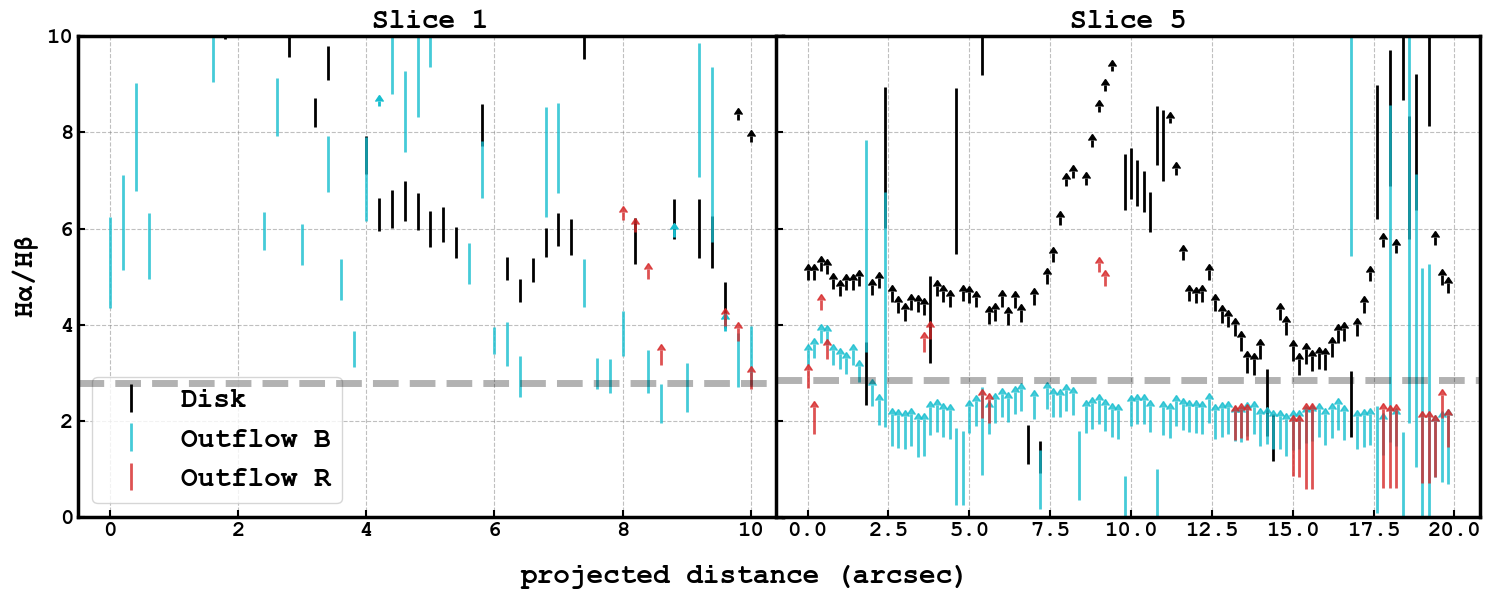

In [19]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=False, sharey='row')

## hbeta/halpha ###
ax1.axhline(2.8, color='black', ls='--',lw=5,alpha=0.3,zorder=10)
ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_disk < 1e17], 
         np.array(Ha_list1_disk)[HB_slice1_disk < 1e17] / HB_slice1_disk[HB_slice1_disk < 1e17], 
         yerr=errs1_disk,fmt='None',color='black',label='Disk',lw=2)
ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_disk > 1e17], 
         np.array(Ha_list1_disk)[HB_slice1_disk > 1e17] / (HB_slice1_disk/1e17)[HB_slice1_disk > 1e17], 
                  yerr=[[0]*len(errs1_disk_lims),list(errs1_disk_lims)],
             lolims=True,fmt='None',color='black',lw=2)

ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_outb < 1e17], 
         np.array(Ha_list1_blue)[HB_slice1_outb < 1e17] / HB_slice1_outb[HB_slice1_outb < 1e17], 
         yerr=errs1_outb,fmt='None',color='tab:cyan',label='Outflow B',lw=2,alpha=0.8)
ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_outb > 1e17], 
         np.array(Ha_list1_blue)[HB_slice1_outb > 1e17] / (HB_slice1_outb/1e17)[HB_slice1_outb > 1e17], 
                  yerr=[[0]*len(errs1_outb_lims),list(errs1_outb_lims)],
             lolims=True,fmt='None',color='tab:cyan',lw=2)

ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_outr < 1e17], 
         np.array(Ha_list1_red)[HB_slice1_outr < 1e17] / HB_slice1_outb[HB_slice1_outr < 1e17], 
         yerr=errs1_outr,fmt='None',color='tab:red',label='Outflow R',lw=2,alpha=0.8)
ax1.errorbar(NIIspatial_axis_arcsec1[HB_slice1_outr > 1e17], 
         np.array(Ha_list1_red)[HB_slice1_outr > 1e17] / (HB_slice1_outr/1e17)[HB_slice1_outr > 1e17], 
                  yerr=[[0]*len(errs1_outr_lims),list(errs1_outr_lims)],
             lolims=True,fmt='None',color='tab:red',lw=2,alpha=0.8)

ax1.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax1.set_ylabel(r'H$\alpha$/H$\beta$', fontsize=20)
ax1.grid(ls='--',color='gray', alpha=0.5)
ax1.set_ylim(0,10)
ax1.legend(fontsize=20, loc='lower left')
ax1.set_title('Slice 1', fontsize=20)

# ======================================================================================================

ax2.axhline(2.85, color='black', ls='--',lw=5,alpha=0.3,zorder=10)
ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_disk < 1e17], 
         np.array(Ha_list5_disk)[HB_slice5_disk < 1e17] / HB_slice5_disk[HB_slice5_disk < 1e17], 
         yerr=errs5_disk,fmt='None',color='black',label='Disk',lw=2)
ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_disk > 1e17], 
         np.array(Ha_list5_disk)[HB_slice5_disk > 1e17] / (HB_slice5_disk/1e17)[HB_slice5_disk > 1e17], 
                  yerr=[[0]*len(errs5_disk_lims),list(errs5_disk_lims)],
             lolims=True,fmt='None',color='black',lw=2)

ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_outb < 1e17], 
         np.array(Ha_list5_blue)[HB_slice5_outb < 1e17] / HB_slice5_outb[HB_slice5_outb < 1e17], 
         yerr=errs5_outb,fmt='None',color='tab:cyan',label='Outflow B',lw=2,alpha=0.8)
ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_outb > 1e17], 
         np.array(Ha_list5_blue)[HB_slice5_outb > 1e17] / (HB_slice5_outb/1e17)[HB_slice5_outb > 1e17], 
                  yerr=[[0]*len(errs5_outb_lims),list(errs5_outb_lims)],
             lolims=True,fmt='None',color='tab:cyan',lw=2,alpha=0.8)

ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_outr < 1e17], 
         np.array(Ha_list5_red)[HB_slice5_outr < 1e17] / HB_slice5_outb[HB_slice5_outr < 1e17], 
         yerr=errs5_outr,fmt='None',color='tab:red',label='Outflow R',lw=2,alpha=0.8)
ax2.errorbar(NIIspatial_axis_arcsec5[HB_slice5_outr > 1e17], 
         np.array(Ha_list5_red)[HB_slice5_outr > 1e17] / (HB_slice5_outr/1e17)[HB_slice5_outr > 1e17], 
                  yerr=[[0]*len(errs5_outr_lims),list(errs5_outr_lims)],
             lolims=True,fmt='None',color='tab:red',lw=2,alpha=0.8)


ax2.tick_params(axis='both', which='both',direction='in', width=1.5, labelsize=16, length=5, color='black')
ax2.grid(ls='--',color='gray', alpha=0.5)
ax2.set_title('Slice 5', fontsize=20)

f.supxlabel('projected distance (arcsec)', fontsize=20, family='courier new', weight='bold', style='normal')
plt.tight_layout()
plt.subplots_adjust(hspace=-0.01, wspace=-0.01)
plt.savefig('../../ngc253/muse/visuals/halpha_hbeta_slice1_slice5.png', bbox_inches='tight', dpi=200)
plt.savefig('../../ngc253/muse/visuals/halpha_hbeta_slice1_slice5.pdf', bbox_inches='tight', dpi=200)